In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [ ]:
dir = './fruits-360'
classes = os.listdir(dir+'/Training')
print(classes)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

dataset = ImageFolder(dir + '/Training', transform=ToTensor())
print('Size of training dataset :', len(dataset))
test = ImageFolder(dir + '/Test', transform=ToTensor())
print('Size of test dataset :', len(test))

Size of training dataset : 67692
Size of test dataset : 22688


In [ ]:
img, label = dataset[7005]
print(img.shape)

torch.Size([3, 100, 100])


Label:  Avocado (14)


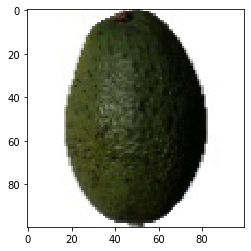

In [ ]:
def show_image(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))
show_image(img,label)

In [ ]:
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(dataset) / batch_size)
num_epochs = int(num_epochs)

In [ ]:
train_loader = DataLoader(dataset, batch_size = batch_size, shuffle = True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = True, num_workers=4,pin_memory=True)

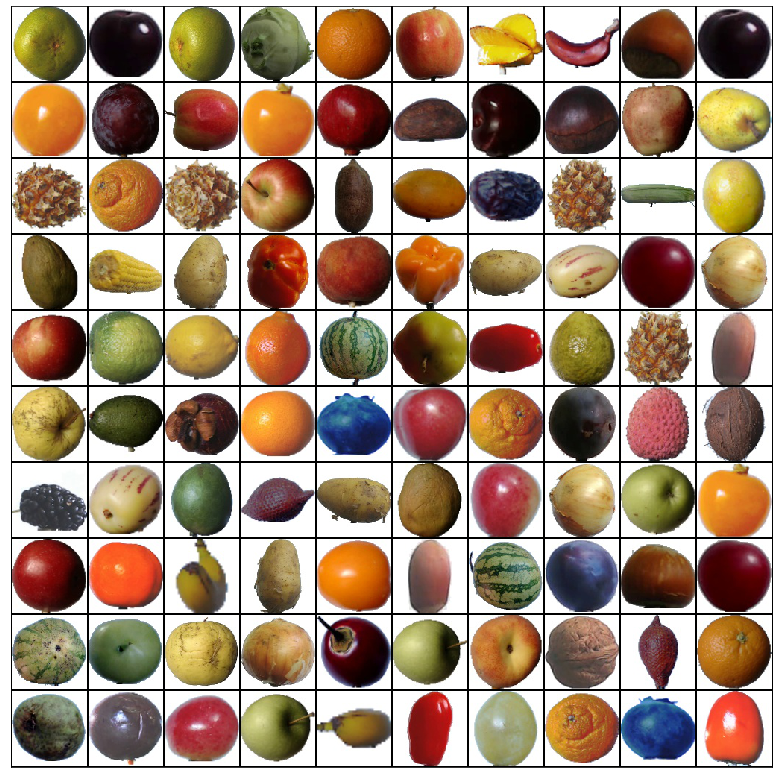

In [ ]:
from torchvision.utils import make_grid

for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(14,14))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=10).permute(1, 2, 0))
    break

In [ ]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ELU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.tanh2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out
input_dim = 3*100*100
hidden_dim = 150
output_dim = 131
model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 3*100*100))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs,labels)
        loss.backward()
        optimizer.step()
        count += 1
        if count % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 3*100*100))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500 Loss: 3.0783495903015137 Accuracy: 25.32175636291504 %
Iteration: 1000 Loss: 1.9218456745147705 Accuracy: 48.519039154052734 %
Iteration: 1500 Loss: 1.6085598468780518 Accuracy: 50.55976867675781 %
Iteration: 2000 Loss: 1.2802330255508423 Accuracy: 52.85172653198242 %
Iteration: 2500 Loss: 0.6132445931434631 Accuracy: 73.36917877197266 %
Iteration: 3000 Loss: 0.44314566254615784 Accuracy: 78.75969696044922 %
Iteration: 3500 Loss: 0.2777440845966339 Accuracy: 81.05606842041016 %
Iteration: 4000 Loss: 0.21184797585010529 Accuracy: 83.1761245727539 %
Iteration: 4500 Loss: 0.3103707432746887 Accuracy: 83.73149108886719 %


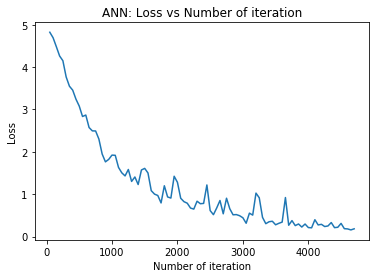

In [ ]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

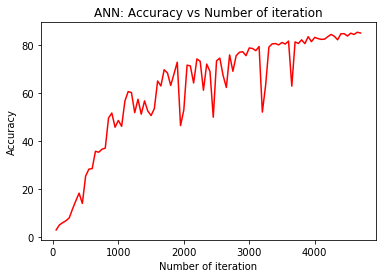

In [ ]:
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()